<a href="https://colab.research.google.com/github/Nandan-03/Intel_Unnati_Internship/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importing libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten,Dropout, Dense
from tensorflow.keras.metrics import Accuracy
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix


In [3]:

# Load the Fashion MNIST dataset
(X, y), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print("Number of training images:", len(X))
print("Number of test images:", len(X_test))

4422102/4422102 [==============================] - 0s 0us/step
Number of training images: 60000
Number of test images: 10000


In [4]:
# Normalize pixel values to the range [0, 1]
X=X.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the images to have a single grayscale channel
X= X.reshape((X.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Setiing parameters
test_size=0.25
random_state=1234

# Splitting the training data into training and validation set into a split ratio of 75-25 %
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state)

In [5]:

# Convert labels to one-hot encoding
num_classes=10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [7]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.5),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')

])



# Compile the model
# Optimizer specified here is adam with learning rate 0.001, loss is categorical crossentrophy and metric is accuracy
learning_rate = 0.001
optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer,  loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
history=model.fit(X_train, y_train, batch_size=128, epochs=70, verbose=1, validation_data=(X_val, y_val))


Epoch 1/70
352/352 [==============================] - 38s 102ms/step - loss: 0.7064 - accuracy: 0.7414 - val_loss: 0.4425 - val_accuracy: 0.8395
Epoch 2/70
352/352 [==============================] - 36s 102ms/step - loss: 0.4298 - accuracy: 0.8436 - val_loss: 0.3447 - val_accuracy: 0.8768
Epoch 3/70
352/352 [==============================] - 32s 91ms/step - loss: 0.3697 - accuracy: 0.8638 - val_loss: 0.3135 - val_accuracy: 0.8868
Epoch 4/70
352/352 [==============================] - 38s 107ms/step - loss: 0.3339 - accuracy: 0.8777 - val_loss: 0.2901 - val_accuracy: 0.8923
Epoch 5/70
352/352 [==============================] - 36s 101ms/step - loss: 0.3115 - accuracy: 0.8860 - val_loss: 0.2688 - val_accuracy: 0.9025
Epoch 6/70
352/352 [==============================] - 32s 90ms/step - loss: 0.2913 - accuracy: 0.8932 - val_loss: 0.2682 - val_accuracy: 0.9015
Epoch 7/70
352/352 [==============================] - 32s 91ms/step - loss: 0.2772 - accuracy: 0.8991 - val_loss: 0.2496 - val_accur

In [9]:

# Evaluate the model
y_pred = model.predict(X_test)
y_pred = tf.argmax(y_pred, axis=1)
y_true = tf.argmax(y_test, axis=-1)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro', zero_division=0.0)

print("Accuracy:", accuracy)
print("Precision:", precision)
# Compute confusion matrix
confusion = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(confusion)

313/313 [==============================] - 3s 8ms/step
Accuracy: 0.9255
Precision: 0.9254529884594287
Confusion Matrix:
[[882   0  13  15   2   2  81   0   5   0]
 [  1 987   0   9   0   0   1   0   2   0]
 [ 20   1 910   7  28   0  34   0   0   0]
 [ 12   3   9 947  12   0  16   0   1   0]
 [  0   0  72  30 846   0  51   0   1   0]
 [  0   0   0   0   0 988   0  10   0   2]
 [ 92   0  61  25  48   0 765   0   9   0]
 [  0   0   0   0   0   5   0 984   0  11]
 [  3   0   3   3   1   3   1   1 985   0]
 [  0   0   1   0   0   5   0  33   0 961]]


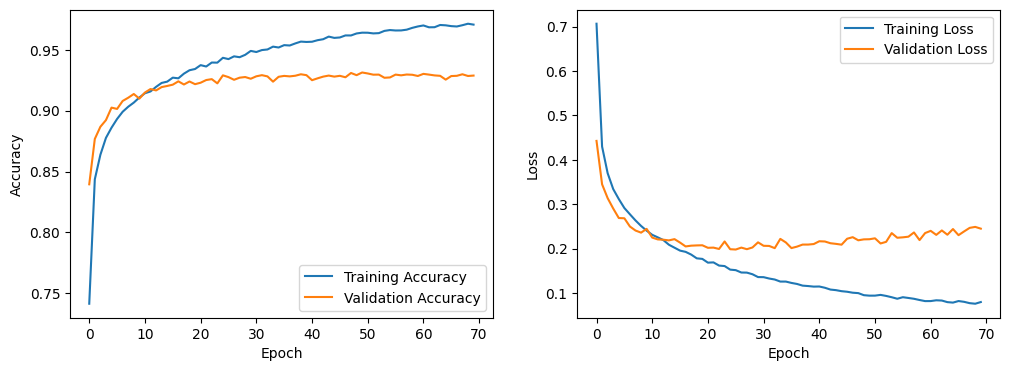

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:

# Plot accuracy and loss during training
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

#Save the model
model.save("FINAL.h5")